# Imports

In [2]:
import numpy as np
import corner
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from astropy.table import Table

import model_flux_ratio as mfr

# MCMC run results

## Read in 

In [14]:
ndim = 8
onevar = -1

nwalkers = 500
nmbr = 1000
burnin = int(0.8*nmbr) #int(0.1*nmbr)

chains = np.load('/Users/thsyu/Software/Yp/test_no_Ha_500walkers_1000steps.npy')
samples = chains[:, burnin:, :].reshape((-1, ndim))

chains2 = np.load('/Users/thsyu/Software/Yp/test_all_500walkers_1000steps.npy')
samples2 = chains2[:, burnin:, :].reshape((-1, ndim))

#nir_chains = np.load('test_MCMC_EWdist_cont_500walkers_1000steps.npy')
#nir_samples = nir_chains[:, burnin:, :].reshape((-1, ndim))

## Input parameters vs Best MCMC parameters

In [4]:
prenams = ['y+', 'temperature', '$log(n_{e})$', 'c(H\\beta)', '$a_{H}$', '$a_{He}$', '$\\tau_{He}', '$log(\\xi)$'] #'$n_{HI}$']
input_vals = np.array([0.08, 18000, 2, 0.1, 1.0, 1.0, 1.0, -4]) #test_MCMC
#input_vals = np.array([0.088, 16500, 2.2, 0.1, 3.0, 0.3, 0.5, 0.0]) # Synthetic 2
#input_vals = np.array([0.0837, 17100, 0, 0.1, 0.94, 0.50, 0.0, -6]) #Leo P w/out HeI 5015
#input_vals = np.array([0.0837, 17200, 0, 0.1, 1.02, 0.45, 0.0, -6]) #Leo P w/HeI 5015
#input_vals = np.array([0.08634, 12979, 1.987, 0.15, 2.31, 0.37, 2.27, -1.767]) # AOS 2015's solved parameters for Mrk450 No.1

print ('Best parameter values:')
#y_plus_mcmc, temp_mcmc, dens_mcmc, c_Hb_mcmc, a_H_mcmc, a_He_mcmc, tau_He_mcmc, n_HI_mcmc = map(
#    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))
y_plus_mcmc, temp_mcmc, log_dens_mcmc, c_Hb_mcmc, a_H_mcmc, a_He_mcmc, tau_He_mcmc, log_xi_mcmc = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))
print ('y+', y_plus_mcmc)
print ('T', temp_mcmc)
print ('log(n_e)', log_dens_mcmc)
print ('c(Hb)', c_Hb_mcmc)
print ('a_H', a_H_mcmc)
print ('a_He', a_He_mcmc)
print ('tau_He', tau_He_mcmc)
print ('log(xi)', log_xi_mcmc)
#print ('n_HI', n_HI_mcmc)
print ('\n Input parameter values:')
print (input_vals)

Best parameter values:
y+ (0.08094248934702039, 0.009117611915735582, 0.007230391508802642)
T (16681.36466880519, 2119.9513473252155, 2093.6182684283885)
log(n_e) (1.9848725607618216, 0.24014777353890793, 0.38698707294830514)
c(Hb) (0.10708932000884994, 0.09248718832858244, 0.06994165064520493)
a_H (1.0538153973654383, 1.1774684714954142, 0.7274856763409449)
a_He (0.9153995485497733, 0.769697942717582, 0.6091662810120679)
tau_He (1.2707487312425738, 0.9817598084136026, 0.80263872833096)
log(xi) (-4.0953683268074075, 1.2961896220498592, 1.2759491338569413)

 Input parameter values:
[ 8.0e-02  1.8e+04  2.0e+00  1.0e-01  1.0e+00  1.0e+00  1.0e+00 -4.0e+00]


In [16]:
y_plus_mcmc2, temp_mcmc2, log_dens_mcmc2, c_Hb_mcmc2, a_H_mcmc2, a_He_mcmc2, tau_He_mcmc2, log_xi_mcmc2 = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(samples2, [16, 50, 84], axis=0)))

In [43]:
print (a_H_mcmc2)

(1.0433601982513632, 0.8791846962171574, 0.7018920214463502)


## Corner plot

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


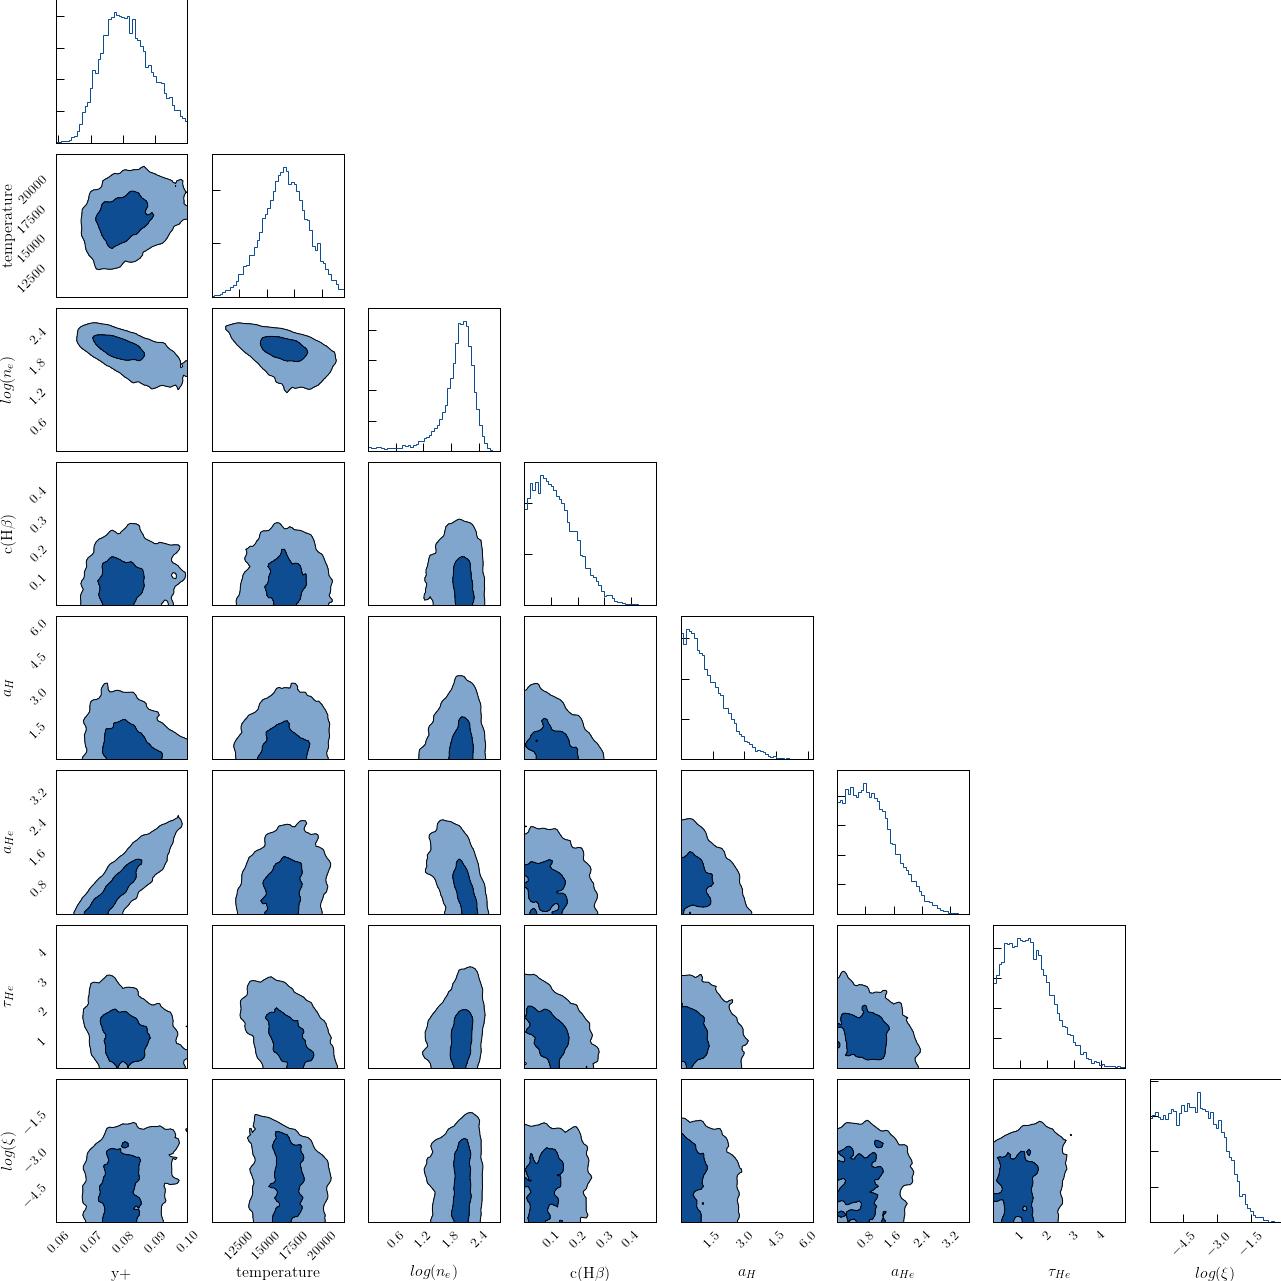

In [5]:
levels = 1.0 - np.exp(-0.5 * np.arange(1.0, 2.1, 1.0) ** 2)
contour_kwargs, contourf_kwargs = dict({}), dict({})
contour_kwargs["linewidths"] = [1.0, 1.0]
contourf_kwargs["colors"] = ((1, 1, 1), (0.502, 0.651, 0.808), (0.055, 0.302, 0.5727))
hist_kwargs = dict({})
hist_kwargs["color"] = contourf_kwargs["colors"][-1]
fig = corner.corner(samples, bins=[50, 50, 50, 50, 50, 50, 50, 50], levels=levels, plot_datapoints=False, fill_contours=True, smooth=1,
plot_density=False, contour_kwargs=contour_kwargs, contourf_kwargs=contourf_kwargs, hist_kwargs=hist_kwargs, labels=prenams)#, truths=input_vals)
fig.savefig('{0:s}_{1:d}walkers_{2:d}steps.pdf'.format('/Users/thsyu/Software/Yp/test_no_Ha_cornerplot', nwalkers, nmbr), overwrite=True)

## Time evolution of parameters

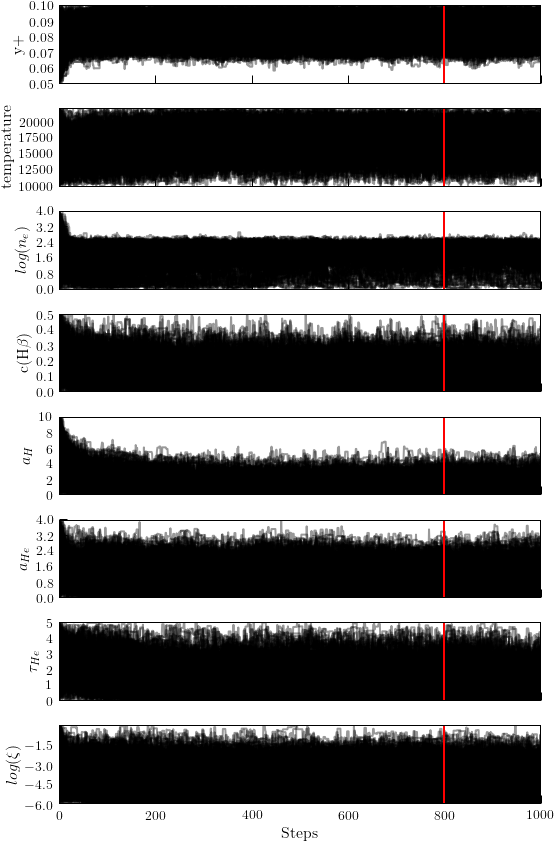

In [7]:
fig, axes = plt.subplots(ndim, 1, sharex=True, figsize=(8, 12))
for i in range(ndim):
    axes[i].plot(chains[:, :, i].T, color="k", alpha=0.4)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].axvline(burnin, color='red')
    axes[i].set_ylabel(prenams[i])
axes[7].set_xlabel('Steps')
fig.tight_layout(h_pad=0.0)
fig.savefig('{0:s}_{1:d}walkers_{2:d}steps.pdf'.format('/Users/thsyu/Software/Yp/test_no_Ha_timeevol', nwalkers, nmbr), overwrite=True)

## Parameter vs Parameters

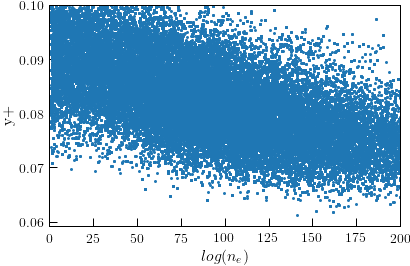

In [6]:
plt.plot(10**samples[:,2], samples[:,0], '.')
plt.xlim(0, 200)
#plt.ylim(0.05, 0.051)
#plt.ylim(0.06, 0.12)
plt.xlabel(r'$log(n_{e})$')
plt.ylabel('y+')
plt.show()

## Histogram of Parameters

In [89]:
a_H_mcmc[0]-a_H_mcmc[1]

-0.12365307412997595

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


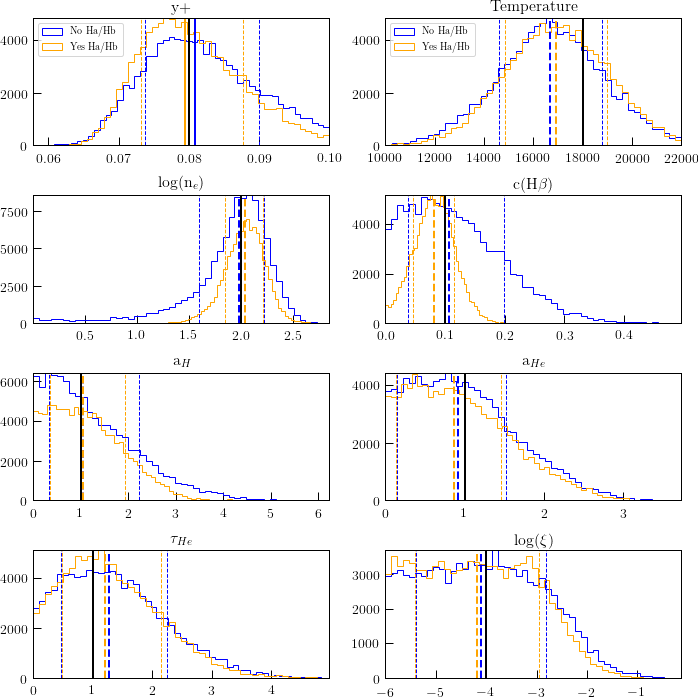

In [93]:
f, ax = plt.subplots(4,2, figsize=(10, 10))

ax[0,0].hist(samples[:,0], bins=50, histtype='step', color='blue', label='No Ha/Hb')
ax[0,0].axvline(y_plus_mcmc[0], color='blue')
ax[0,0].axvline(y_plus_mcmc[0]+y_plus_mcmc[1], ls='--', linewidth=1.0, color='blue')
ax[0,0].axvline(y_plus_mcmc[0]-y_plus_mcmc[2], ls='--', linewidth=1.0, color='blue')
ax[0,0].hist(samples2[:,0], bins=50, histtype='step', color='orange', label='Yes Ha/Hb')
ax[0,0].axvline(y_plus_mcmc2[0], color='orange')
ax[0,0].axvline(y_plus_mcmc2[0]+y_plus_mcmc2[1], ls='--', linewidth=1.0,color='orange')
ax[0,0].axvline(y_plus_mcmc2[0]-y_plus_mcmc2[2], ls='--', linewidth=1.0,color='orange')
ax[0,0].axvline(0.08, color='black')
ax[0,0].legend()
ax[0,0].set_title('y+')
ax[0,1].hist(samples[:,1], bins=50, histtype='step', color='blue', label='No Ha/Hb')
ax[0,1].axvline(temp_mcmc[0], ls='--', color='blue')
ax[0,1].axvline(temp_mcmc[0]+temp_mcmc[1], ls='--', linewidth=1.0, color='blue')
ax[0,1].axvline(temp_mcmc[0]-temp_mcmc[2], ls='--', linewidth=1.0, color='blue')
ax[0,1].hist(samples2[:,1], bins=50, histtype='step', color='orange', label='Yes Ha/Hb')
ax[0,1].axvline(temp_mcmc2[0], ls='--', color='orange')
ax[0,1].axvline(temp_mcmc2[0]+temp_mcmc2[1], ls='--', linewidth=1.0,color='orange')
ax[0,1].axvline(temp_mcmc2[0]-temp_mcmc2[2], ls='--', linewidth=1.0,color='orange')
ax[0,1].axvline(18000, color='black')
ax[0,1].legend()
ax[0,1].set_title('Temperature')
ax[1,0].hist(samples[:,2], bins=50, histtype='step', color='blue', label='No Ha/Hb')
ax[1,0].axvline(log_dens_mcmc[0], ls='--', color='blue')
ax[1,0].axvline(log_dens_mcmc[0]+log_dens_mcmc[1], ls='--', linewidth=1.0, color='blue')
ax[1,0].axvline(log_dens_mcmc[0]-log_dens_mcmc[2], ls='--', linewidth=1.0, color='blue')
ax[1,0].hist(samples2[:,2], bins=50, histtype='step', color='orange', label='Yes Ha/Hb')
ax[1,0].axvline(log_dens_mcmc2[0], ls='--', color='orange')
ax[1,0].axvline(log_dens_mcmc2[0]+log_dens_mcmc2[1], ls='--', linewidth=1.0,color='orange')
ax[1,0].axvline(log_dens_mcmc2[0]-log_dens_mcmc2[2], ls='--', linewidth=1.0,color='orange')
ax[1,0].axvline(2, color='black')
#ax[1,0].legend()
ax[1,0].set_title(r'log(n$_{e}$)')
ax[1,1].hist(samples[:,3], bins=50, histtype='step', color='blue', label='No Ha/Hb')
ax[1,1].axvline(c_Hb_mcmc[0], ls='--', color='blue')
ax[1,1].axvline(c_Hb_mcmc[0]+c_Hb_mcmc[1], ls='--', linewidth=1.0, color='blue')
ax[1,1].axvline(c_Hb_mcmc[0]-c_Hb_mcmc[2], ls='--', linewidth=1.0, color='blue')
ax[1,1].hist(samples2[:,3], bins=50, histtype='step', color='orange', label='Yes Ha/Hb')
ax[1,1].axvline(c_Hb_mcmc2[0], ls='--', color='orange')
ax[1,1].axvline(c_Hb_mcmc2[0]+c_Hb_mcmc2[1], ls='--', linewidth=1.0,color='orange')
ax[1,1].axvline(c_Hb_mcmc2[0]-c_Hb_mcmc2[2], ls='--', linewidth=1.0,color='orange')
ax[1,1].axvline(0.1, color='black')
#ax[1,1].legend()
ax[1,1].set_title(r'c(H$\beta$)')
ax[2,0].hist(samples[:,4], bins=50, histtype='step', color='blue', label='No Ha/Hb')
ax[2,0].axvline(a_H_mcmc[0], ls='--', color='blue')
ax[2,0].axvline(a_H_mcmc[0]+a_H_mcmc[1], ls='--', linewidth=1.0, color='blue')
ax[2,0].axvline(a_H_mcmc[0]-a_H_mcmc[2], ls='--', linewidth=1.0, color='blue')
ax[2,0].hist(samples2[:,4], bins=50, histtype='step', color='orange', label='Yes Ha/Hb')
ax[2,0].axvline(a_H_mcmc2[0], ls='--', color='orange')
ax[2,0].axvline(a_H_mcmc2[0]+a_H_mcmc2[1], ls='--', linewidth=1.0,color='orange')
ax[2,0].axvline(a_H_mcmc2[0]-a_H_mcmc2[2], ls='--', linewidth=1.0,color='orange')
ax[2,0].axvline(1.0, color='black')
#ax[2,0].legend()
ax[2,0].set_title(r'a$_{H}$')
ax[2,1].hist(samples[:,5], bins=50, histtype='step', color='blue', label='No Ha/Hb')
ax[2,1].axvline(a_He_mcmc[0], ls='--', color='blue')
ax[2,1].axvline(a_He_mcmc[0]-a_He_mcmc[1], ls='--', linewidth=1.0, color='blue')
ax[2,1].axvline(a_He_mcmc[0]+a_He_mcmc[2], ls='--', linewidth=1.0, color='blue')
ax[2,1].hist(samples2[:,5], bins=50, histtype='step', color='orange', label='Yes Ha/Hb')
ax[2,1].axvline(a_He_mcmc2[0], ls='--', color='orange')
ax[2,1].axvline(a_He_mcmc2[0]-a_He_mcmc2[1], ls='--', linewidth=1.0,color='orange')
ax[2,1].axvline(a_He_mcmc2[0]+a_He_mcmc2[2], ls='--', linewidth=1.0,color='orange')
ax[2,1].axvline(1.0, color='black')
#ax[2,1].legend()
ax[2,1].set_title(r'a$_{He}$')
ax[3,0].hist(samples[:,6], bins=50, histtype='step', color='blue', label='No Ha/Hb')
ax[3,0].axvline(tau_He_mcmc[0], ls='--', color='blue')
ax[3,0].axvline(tau_He_mcmc[0]+tau_He_mcmc[1], ls='--', linewidth=1.0, color='blue')
ax[3,0].axvline(tau_He_mcmc[0]-tau_He_mcmc[2], ls='--', linewidth=1.0, color='blue')
ax[3,0].hist(samples2[:,6], bins=50, histtype='step', color='orange', label='Yes Ha/Hb')
ax[3,0].axvline(tau_He_mcmc2[0], ls='--', color='orange')
ax[3,0].axvline(tau_He_mcmc2[0]+tau_He_mcmc2[1], ls='--', linewidth=1.0,color='orange')
ax[3,0].axvline(tau_He_mcmc2[0]-tau_He_mcmc2[2], ls='--', linewidth=1.0,color='orange')
ax[3,0].axvline(1.0, color='black')
#ax[3,0].legend()
ax[3,0].set_title(r'$\tau_{He}$')
ax[3,1].hist(samples[:,7], bins=50, histtype='step', color='blue', label='No Ha/Hb')
ax[3,1].axvline(log_xi_mcmc[0], ls='--', color='blue')
ax[3,1].axvline(log_xi_mcmc[0]-log_xi_mcmc[1], ls='--', linewidth=1.0, color='blue')
ax[3,1].axvline(log_xi_mcmc[0]+log_xi_mcmc[2], ls='--', linewidth=1.0, color='blue')
ax[3,1].hist(samples2[:,7], bins=50, histtype='step', color='orange', label='Yes Ha/Hb')
ax[3,1].axvline(log_xi_mcmc2[0], ls='--', color='orange')
ax[3,1].axvline(log_xi_mcmc2[0]-log_xi_mcmc2[1], ls='--', linewidth=1.0,color='orange')
ax[3,1].axvline(log_xi_mcmc2[0]+log_xi_mcmc2[2], ls='--', linewidth=1.0,color='orange')
ax[3,1].axvline(-4, color='black')
#ax[3,1].legend()
ax[3,1].set_title(r'log($\xi$)')

#f.savefig('/Users/thsyu/Software/Yp/all_vs_noHa_hist.pdf', overwrite=True)
f.show()




## Are these recovered parameters good?

In [60]:
import importlib
importlib.reload(mfr)

<module 'model_flux_ratio' from '/Users/thsyu/Software/Yp/model_flux_ratio.py'>

### Target case

#### Original input

In [52]:
targ_input = Table.read('/Users/thsyu/Software/Yp/test_output_flux', format='ascii', delimiter=' ')
targ_input

Wavelength,Species,Flux Ratio,Flux Ratio Errors,EW,EW Errors
float64,str8,float64,float64,int64,float64
3890.166,hydrogen,0.1564011638862346,0.007,10,1.0
4027.328,helium,0.015111008248123467,0.01,10,1.0
4102.891,hydrogen,0.24792861621053786,0.008,75,7.5
4341.684,hydrogen,0.45499103289058085,0.011,100,10.0
4472.755,helium,0.033244107965137645,0.006,10,1.0
4862.721,hydrogen,1.0,0.02,250,25.0
5017.079,helium,0.02075443500495452,0.004,5,0.5
5877.299,helium,0.09662305848414471,0.004,10,1.0
6564.612,hydrogen,2.968511322764043,0.089,350,35.0


#### Generate would-be fluxes from the recovered MCMC parameters

In [64]:
mfr.generate_emission_line_ratio('test_MCMCoutput', [3890.166, 4027.328, 4102.891, 4341.684, 4472.755, 4862.721, 5017.079, 5877.299, 6564.612, 6679.994, 7067.198, 10833.306], \
                             [10, 10, 75, 100, 10, 250, 5, 10, 350, 10, 5, 200], 250, \
                             y_plus_mcmc[0], temp_mcmc[0], log_dens_mcmc[0], c_Hb_mcmc[0], a_H_mcmc[0], a_He_mcmc[0], tau_He_mcmc[0], log_xi_mcmc[0], \
                                EW_Pg = 50.)

Working on  3890.166
Working on  4027.328
Working on  4102.891
Working on  4341.684
Working on  4472.755
Working on  4862.721
Working on  5017.079
Working on  5877.299
Working on  6564.612
Working on  6679.994
Working on  7067.198
Working on  10833.306


In [77]:
targ_output = Table.read('/Users/thsyu/Software/Yp/test_MCMCoutput', format='ascii', delimiter=' ')
targ_output

Wavelength,Species,Flux Ratio,EW
float64,str8,float64,int64
3890.166,hydrogen,0.15490195027597184,10
4027.328,helium,0.015481052642864139,10
4102.891,hydrogen,0.24653474166727074,75
4341.684,hydrogen,0.45319413806460623,100
4472.755,helium,0.03410771214619672,10
4862.721,hydrogen,1.0,250
5017.079,helium,0.02112553514188556,5
5877.299,helium,0.09971924924243762,10
6564.612,hydrogen,2.9904422226250302,350


In [78]:
targ_output2 = Table.read('/Users/thsyu/Software/Yp/test_MCMCoutput2', format='ascii', delimiter=' ')
targ_output2

Wavelength,Species,Flux Ratio,EW
float64,str8,float64,int64
3890.166,hydrogen,0.15795698606717457,10
4027.328,helium,0.01553701203090906,10
4102.891,hydrogen,0.2500572074409225,75
4341.684,hydrogen,0.45761119272864853,100
4472.755,helium,0.03392360953793805,10
4862.721,hydrogen,1.0,250
5017.079,helium,0.020967143704099387,5
5877.299,helium,0.09753695791748039,10
6564.612,hydrogen,2.9350218672318387,350


### Plot input vs output flux ratios

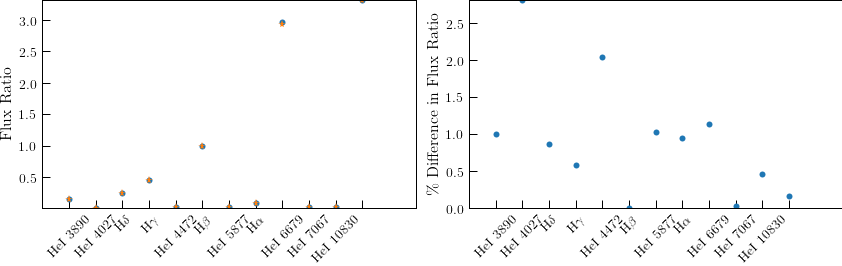

In [61]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(targ_input['Flux Ratio'][:-1], 'o', label='Measured')
ax1.plot(targ_output['Flux Ratio'], marker='*', markersize=8, linestyle='None', label='MCMC Predicted')
ax1.set_xticks(np.arange(0, len(targ_output), 1))
ax1.set_xticklabels(['HeI 3890', 'HeI 4027', r'H$\delta$', r'H$\gamma$', \
                     'HeI 4472', r'H$\beta$', 'HeI 5877', r'H$\alpha$', \
                     'HeI 6679', 'HeI 7067', 'HeI 10830'], rotation=45)
ax1.set_xlim(-1, len(targ_output)+1)
#ax1.set_ylim(-0.5, 4.0)
ax1.set_ylabel('Flux Ratio')

ax2.plot(np.abs(100*(targ_input['Flux Ratio'][:-1]-targ_output['Flux Ratio'])/targ_input['Flux Ratio'][:-1]), 'o')
ax2.set_xticks(np.arange(0, len(targ_output), 1))
ax2.set_xticklabels(['HeI 3890', 'HeI 4027', r'H$\delta$', r'H$\gamma$', \
                     'HeI 4472', r'H$\beta$', 'HeI 5877', r'H$\alpha$', \
                     'HeI 6679', 'HeI 7067', 'HeI 10830'], rotation=45)
ax2.set_xlim(-1, len(targ_output)+1)
ax2.set_ylabel(r'\% Difference in Flux Ratio')

#f.savefig('/Users/thsyu/Software/Yp/Tol.pdf', overwrite=True)
f.show()

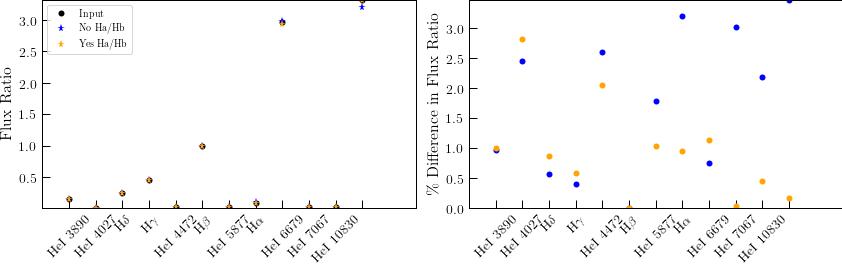

In [81]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(targ_input['Flux Ratio'][:-1], 'o', color='black', label='Input')
ax1.plot(targ_output['Flux Ratio'], marker='*', markersize=8, linestyle='None', color='blue', label='No Ha/Hb')
ax1.plot(targ_output2['Flux Ratio'], marker='*', markersize=8, linestyle='None', color='orange', label='Yes Ha/Hb')
ax1.set_xticks(np.arange(0, len(targ_output), 1))
ax1.set_xticklabels(['HeI 3890', 'HeI 4027', r'H$\delta$', r'H$\gamma$', \
                     'HeI 4472', r'H$\beta$', 'HeI 5877', r'H$\alpha$', \
                     'HeI 6679', 'HeI 7067', 'HeI 10830'], rotation=45)
ax1.set_xlim(-1, len(targ_output)+1)
#ax1.set_ylim(-0.5, 4.0)
ax1.legend()
ax1.set_ylabel('Flux Ratio')

ax2.plot(np.abs(100*(targ_input['Flux Ratio'][:-1]-targ_output['Flux Ratio'])/targ_input['Flux Ratio'][:-1]), 'o', color='blue')
ax2.plot(np.abs(100*(targ_input['Flux Ratio'][:-1]-targ_output2['Flux Ratio'])/targ_input['Flux Ratio'][:-1]), 'o', color='orange')
ax2.set_xticks(np.arange(0, len(targ_output), 1))
ax2.set_xticklabels(['HeI 3890', 'HeI 4027', r'H$\delta$', r'H$\gamma$', \
                     'HeI 4472', r'H$\beta$', 'HeI 5877', r'H$\alpha$', \
                     'HeI 6679', 'HeI 7067', 'HeI 10830'], rotation=45)
ax2.set_xlim(-1, len(targ_output)+1)
ax2.set_ylabel(r'\% Difference in Flux Ratio')


f.savefig('/Users/thsyu/Software/Yp/all_vs_noHa_flux.pdf', overwrite=True)
f.show()

#### Test for differences in flux components to try to identify most discrepant parts

In [46]:
mfr.generate_nir_emission_line_ratio('testHeI10830', [10833.306], [200], 250, 50, \
       y_plus_mcmc[0], temp_mcmc[0], log_dens_mcmc[0], c_Hb_mcmc[0], a_H_mcmc[0], a_He_mcmc[0], tau_He_mcmc[0], log_xi_mcmc[0])

Working on  10833.306


# Can I extrapolate the SMC reddening curve for HeI10830?

In [ ]:
import scipy.interpolate as interp

f_lambda_avg = Table.read(path+'/tables/average_extinction_curve', format='ascii', delimiter=' ')
f_lambda_avg_interp = interp.interp1d(f_lambda_avg['wavelength'], f_lambda_avg['X(x)'])

In [ ]:
f_lambda_avg_interp(9000)

In [ ]:
f_lambda_avg

In [ ]:
xvals = np.linspace(3750, 9750, num=50)
xvals_extrap = np.linspace(3000, 11000, num=50)

In [ ]:
test_extrap = np.polyfit(f_lambda_avg['wavelength'], f_lambda_avg['X(x)'], deg=2)
test_extrap

In [ ]:

test_extrap = np.polyfit(f_lambda_avg['wavelength'], f_lambda_avg['X(x)'], deg=2)
test_extrap[0]*11000**2 + test_extrap[1]*11000 + test_extrap[2]

In [ ]:
plt.subplots(figsize=(10, 10))
plt.plot(f_lambda_avg['wavelength'], f_lambda_avg['X(x)'])
plt.plot(xvals, f_lambda_avg_interp(xvals))
plt.plot(xvals_extrap, test_extrap[0]*xvals_extrap**2 + test_extrap[1]*xvals_extrap + test_extrap[2])
plt.show()